In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset = pd.read_csv("D:/dataset/car_price.csv")

In [3]:
dataset.head(1)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,NaN,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5512 non-null   int64  
 1   car_name             5511 non-null   object 
 2   car_prices_in_rupee  5510 non-null   object 
 3   kms_driven           5511 non-null   object 
 4   fuel_type            5509 non-null   object 
 5   transmission         5512 non-null   object 
 6   ownership            5511 non-null   object 
 7   manufacture          5511 non-null   float64
 8   engine               5512 non-null   object 
 9   Seats                5511 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 430.8+ KB


- Removing missing data

In [5]:
dataset.isnull().sum()/dataset.shape[0]*100

Unnamed: 0             0.000000
car_name               0.018142
car_prices_in_rupee    0.036284
kms_driven             0.018142
fuel_type              0.054427
transmission           0.000000
ownership              0.018142
manufacture            0.018142
engine                 0.000000
Seats                  0.018142
dtype: float64

In [6]:
dataset.shape

(5512, 10)

In [7]:
dataset.dropna(inplace=True)

In [8]:
dataset.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018.0,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016.0,1199 cc,5 Seats
5,5,Volkswagen Vento 1.2 TSI Highline AT,7.66 Lakh,"49,719 kms",Petrol,Automatic,1st Owner,2017.0,1197 cc,5 Seats


In [9]:
def company_name(x):
    if isinstance(x, str) and " " in x:
        return x[:x.index(" ")]
    else:
        return x 

In [10]:
new_column = dataset['car_name'].apply(company_name)

In [11]:
# # creating new column of company name
dataset['company_name'] = new_column

In [12]:
dataset.head(3)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats,Renault
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats,Toyota
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018.0,1199 cc,5 Seats,Honda


In [13]:
def car_name(x):
    if isinstance(x,str) and " " in x:
        return x[x.index(" ")+1:]
    else: 
        return x

In [14]:
new_column2 = dataset["car_name"].apply(car_name)

In [15]:
new_column2

1            Duster RXZ Turbo CVT
2                     Camry 2.5 G
3                     Jazz VX CVT
4           Polo 1.2 MPI Highline
5       Vento 1.2 TSI Highline AT
                  ...            
5507          X1 sDrive 20d xLine
5508            M Series M4 Coupe
5509          XF 2.2 Litre Luxury
5510               7 Series 730Ld
5511        5 Series 520d M Sport
Name: car_name, Length: 5502, dtype: object

In [16]:
dataset['car_name'] = new_column2

In [17]:
dataset.head(3)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
1,1,Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats,Renault
2,2,Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats,Toyota
3,3,Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018.0,1199 cc,5 Seats,Honda


# car_prices_in_rupee

In [18]:
dataset['car_prices_in_rupee'] = dataset['car_prices_in_rupee'].str.replace(',',"")

#mistakes => 35000, lakh, crores ,nan


In [19]:
1.02 * 10000000

10200000.0

Rupees Converter

In [20]:
def rupee_converter(x):
    y = str(x)
    p= y.split(" ")
    try:
        if p[1]=="Lakh":
            return str(round(float(p[0])*100000,1))
        elif p[1]=="Crore":
            return str(round(float(p[0])*10000000,1))
    except:
        return x
    

In [21]:
dataset['car_prices_in_rupee'] = dataset["car_prices_in_rupee"].apply(rupee_converter)

In [22]:
dataset.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
1,1,Duster RXZ Turbo CVT,1283000.0,"13,248 kms",Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats,Renault
2,2,Camry 2.5 G,1640000.0,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats,Toyota
3,3,Jazz VX CVT,777000.0,"26,696 kms",Petrol,Automatic,1st Owner,2018.0,1199 cc,5 Seats,Honda
4,4,Polo 1.2 MPI Highline,515000.0,"69,414 kms",Petrol,Manual,1st Owner,2016.0,1199 cc,5 Seats,Volkswagen
5,5,Vento 1.2 TSI Highline AT,766000.0,"49,719 kms",Petrol,Automatic,1st Owner,2017.0,1197 cc,5 Seats,Volkswagen


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5502 entries, 1 to 5511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5502 non-null   int64  
 1   car_name             5502 non-null   object 
 2   car_prices_in_rupee  5502 non-null   object 
 3   kms_driven           5502 non-null   object 
 4   fuel_type            5502 non-null   object 
 5   transmission         5502 non-null   object 
 6   ownership            5502 non-null   object 
 7   manufacture          5502 non-null   float64
 8   engine               5502 non-null   object 
 9   Seats                5502 non-null   object 
 10  company_name         5502 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 515.8+ KB


In [24]:
dataset['car_prices_in_rupee']= dataset['car_prices_in_rupee'].astype('float')

In [25]:
dataset['kms_driven']= dataset['kms_driven'].str.replace(",","")


In [26]:
dataset['kms_driven']= dataset['kms_driven'].str.replace("kms","")

In [27]:
dataset['kms_driven'] = dataset['kms_driven'].astype("float")

In [28]:
dataset['kms_driven']

1       13248.0
2       60343.0
3       26696.0
4       69414.0
5       49719.0
         ...   
5507    45000.0
5508    29000.0
5509    90000.0
5510    79000.0
5511    42000.0
Name: kms_driven, Length: 5502, dtype: float64

# engine

In [29]:
dataset['engine'] = dataset['engine'].str.replace("cc","")

In [30]:
dataset['engine'] = dataset['engine'].astype("int64")

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5502 entries, 1 to 5511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5502 non-null   int64  
 1   car_name             5502 non-null   object 
 2   car_prices_in_rupee  5502 non-null   float64
 3   kms_driven           5502 non-null   float64
 4   fuel_type            5502 non-null   object 
 5   transmission         5502 non-null   object 
 6   ownership            5502 non-null   object 
 7   manufacture          5502 non-null   float64
 8   engine               5502 non-null   int64  
 9   Seats                5502 non-null   object 
 10  company_name         5502 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 515.8+ KB


# Seats

In [32]:
dataset['Seats'] 

1       5 Seats
2       5 Seats
3       5 Seats
4       5 Seats
5       5 Seats
         ...   
5507    7 Seats
5508    5 Seats
5509    5 Seats
5510    6 Seats
5511    5 Seats
Name: Seats, Length: 5502, dtype: object

In [33]:
dataset['Seats'] = dataset['Seats'].str.replace("Seats","")

In [34]:
dataset['Seats'] = dataset['Seats'].astype("float")

In [35]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
#outliers are detected using manual method

# Carname

In [38]:
car_name_en = LabelEncoder()
dataset['car_name'] = car_name_en.fit_transform(dataset['car_name'])

# Fuel

In [42]:
fuel_type_en = LabelEncoder()
dataset['fuel_type']=fuel_type_en.fit_transform(dataset['fuel_type'])

# Transmission


In [51]:
transmission_en = LabelEncoder()
dataset['transmission']=transmission_en.fit_transform(dataset['transmission'])

In [52]:
dataset['transmission']

1       0
2       0
3       0
4       1
5       0
       ..
5507    0
5508    0
5509    0
5510    0
5511    0
Name: transmission, Length: 5502, dtype: int64

In [53]:
ownership_en = LabelEncoder()
dataset['ownership']=ownership_en.fit_transform(dataset['ownership'])

In [58]:
dataset = dataset.dropna() 

In [60]:
dataset['manufacture'] = dataset['manufacture'].astype('int64')

# Car name

In [62]:
company_name_en = LabelEncoder()
dataset['company_name']=company_name_en.fit_transform(dataset['company_name'])

In [64]:
# removing manufacture because no use
dataset.drop(columns=['manufacture'],inplace =True)

In [65]:
dataset.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,company_name
1,1,509,1283000.0,13248.0,4,0,1,1330,5.0,26
2,2,290,1640000.0,60343.0,4,0,1,2494,5.0,29
3,3,912,777000.0,26696.0,4,0,1,1199,5.0,8
4,4,1095,515000.0,69414.0,4,1,1,1199,5.0,30
5,5,1528,766000.0,49719.0,4,0,1,1197,5.0,30


In [66]:
dataset["Seats"]= dataset["Seats"].astype("int64")

In [67]:
dataset.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,company_name
1,1,509,1283000.0,13248.0,4,0,1,1330,5,26
2,2,290,1640000.0,60343.0,4,0,1,2494,5,29
3,3,912,777000.0,26696.0,4,0,1,1199,5,8
4,4,1095,515000.0,69414.0,4,1,1,1199,5,30
5,5,1528,766000.0,49719.0,4,0,1,1197,5,30


<function matplotlib.pyplot.show(close=None, block=None)>

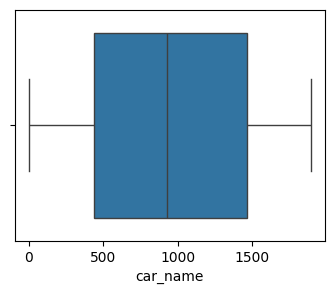

In [69]:
#Outlier detection
plt.figure(figsize=(4,3))
sns.boxplot(x="car_name",data=dataset)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

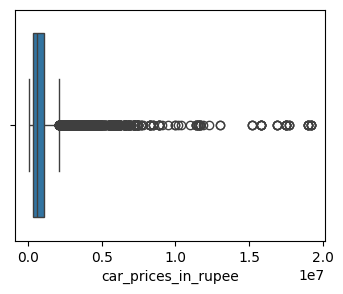

In [70]:
plt.figure(figsize=(4,3))
sns.boxplot(x="car_prices_in_rupee",data=dataset)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

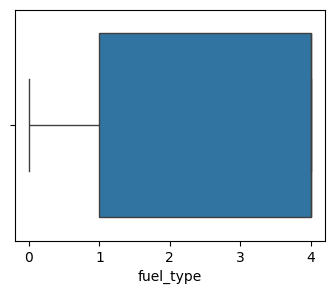

In [71]:
plt.figure(figsize=(4,3))
sns.boxplot(x="fuel_type",data=dataset)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

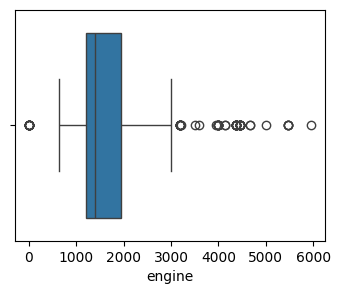

In [72]:
plt.figure(figsize=(4,3))
sns.boxplot(x="engine",data=dataset)
plt.show

In [81]:
dataset.shape

(5502, 10)

# Removing Outliers

In [76]:
#using IQR method to remove 
q1= np.quantile(dataset["engine"],0.25)
q3= np.quantile(dataset['engine'],0.75)

In [77]:
iqr = q3-q1
iqr

753.0

In [78]:
min_range = q1 -(1.5*iqr)
max_range = q3 -(1.5*iqr)

In [79]:
min_range,max_range

(67.5, 820.5)

In [83]:
dataset = dataset[dataset['engine']<=max_range]

In [85]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

ss = StandardScaler()
new_data = pd.DataFrame(ss.fit_transform(dataset), columns=dataset.columns)

In [86]:
new_data

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,company_name
0,-2.054003,-0.035688,-0.319188,-0.334980,0.844206,0.496625,-0.617391,0.253562,-0.277334,1.317423
1,-2.053308,-0.037417,-0.289820,-1.038738,0.844206,0.496625,-0.617391,0.253562,-0.277334,1.317423
2,-2.045666,-0.754731,-0.328147,-0.285579,0.844206,0.496625,-0.617391,0.344197,-0.277334,-0.862599
3,-2.044972,-1.525627,-0.325659,-0.734318,0.844206,0.496625,-0.617391,0.235435,-0.277334,0.291531
4,-2.044277,-0.039145,-0.344573,-0.696413,0.844206,0.496625,-0.617391,0.253562,-0.277334,1.317423
...,...,...,...,...,...,...,...,...,...,...
273,1.630852,0.579646,0.446855,-0.644646,-1.161686,0.496625,0.789451,0.235435,-0.277334,0.163294
274,1.635020,-0.763373,-0.361995,-0.086569,0.844206,0.496625,-0.617391,0.235435,-0.277334,-0.862599
275,1.650304,0.828545,-0.097190,0.136662,-1.161686,0.496625,-0.617391,0.235435,-0.277334,0.291531
276,1.701714,0.752493,-0.334618,0.359893,-1.161686,0.496625,-0.617391,0.253562,2.746147,0.291531
